### Exploratory data analysis

In [1]:
from PIL import Image
import numpy as np
import os
import random
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
PATH = os.getcwd()
dataset_path = os.path.join(PATH, "maps\\train")
split_dataset_path = os.path.join(PATH, "mapsSplit")

train_path = os.path.join(split_dataset_path, "trainSplit")

img_index = random.randint(1, 1096)
img_index = str(img_index)

Primjer originalne slike za treniranje:


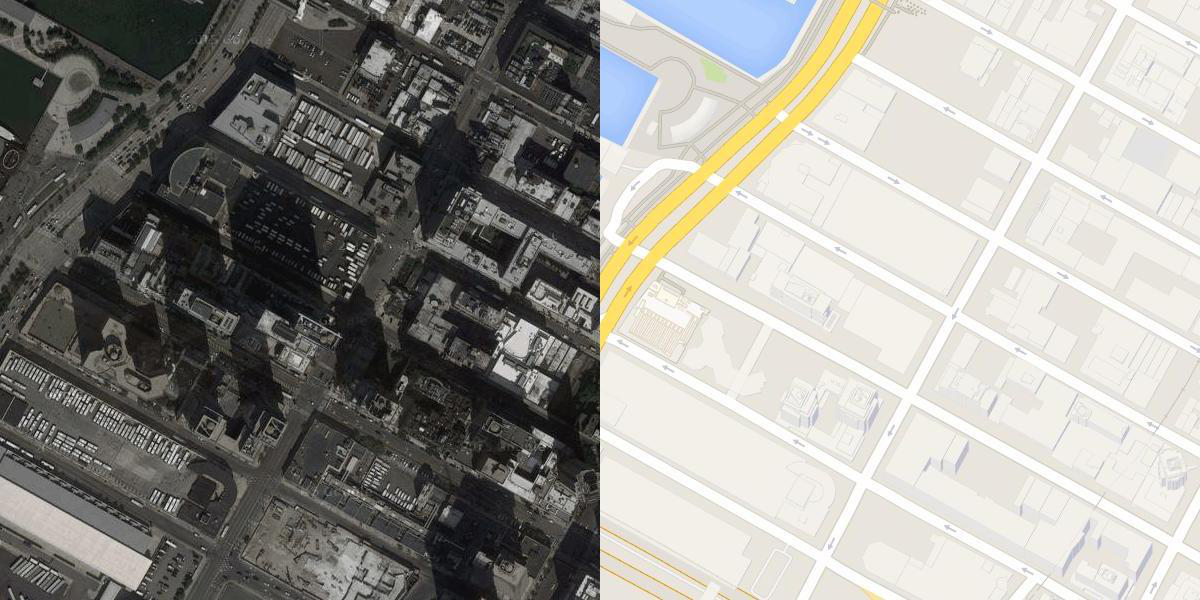

JPEG (1200, 600) RGB


In [3]:
orig_train_image = Image.open(dataset_path + "\\" + img_index + ".jpg")
print("Primjer originalne slike za treniranje:")
display(orig_train_image)
print(orig_train_image.format, orig_train_image.size, orig_train_image.mode)

Primjer slike za treniranje nakon podjele:


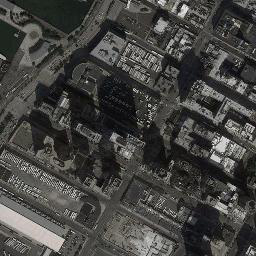

JPEG (256, 256) RGB


In [4]:
img_train = Image.open(train_path + "\\" + img_index + "a.jpg")
print("Primjer slike za treniranje nakon podjele:")
display(img_train)
print(img_train.format, img_train.size, img_train.mode)

In [5]:
print("Raspon jačine piksela na train slici:")
np.min(img_train), np.max(img_train)

Raspon jačine piksela na train slici:


(0, 255)

Primjer slike za validaciju nakon podjele:


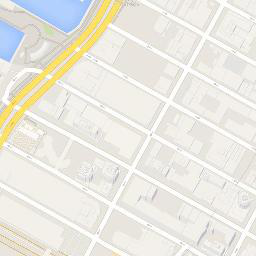

JPEG (256, 256) RGB


In [6]:
img_val = Image.open(train_path + "\\" + img_index + "b.jpg")
print("Primjer slike za validaciju nakon podjele:")
display(img_val)
print(img_val.format, img_val.size, img_val.mode)

In [7]:
print("Raspon jačine piksela na test slici:")
np.min(img_val), np.max(img_val)

Raspon jačine piksela na test slici:


(46, 255)

Scatter plotovi sličnosti piksela između različitih channela na train slici:

(256, 256, 3)
(65536, 3)


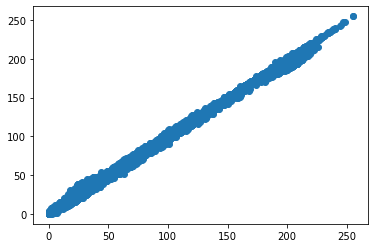

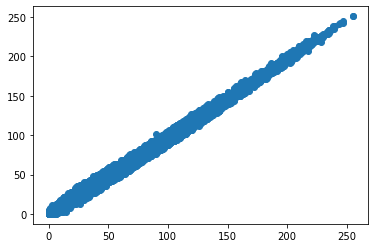

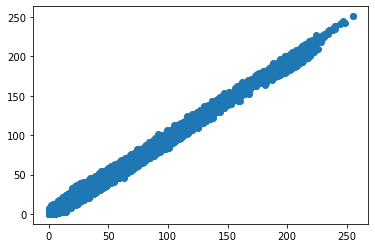

In [8]:
dims = np.shape(img_train)
print(dims)
pixel_matrix_train = np.reshape(img_train, (dims[0] * dims[1], dims[2]))
print(np.shape(pixel_matrix_train))

plt.scatter(pixel_matrix_train[:,0], pixel_matrix_train[:,1])
plt.show()
plt.scatter(pixel_matrix_train[:,1], pixel_matrix_train[:,2])
plt.show()
plt.scatter(pixel_matrix_train[:,0], pixel_matrix_train[:,2])
plt.show()

2D histogram - train:

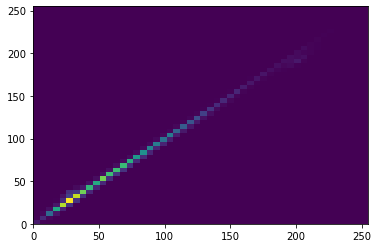

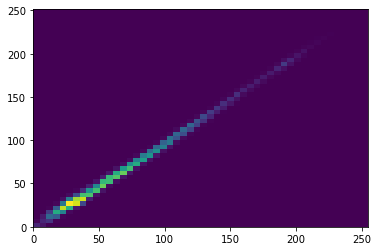

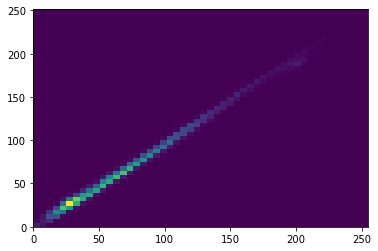

In [9]:
plt.hist2d(pixel_matrix_train[:,0], pixel_matrix_train[:,1], bins=(50,50))
plt.show()
plt.hist2d(pixel_matrix_train[:,1], pixel_matrix_train[:,2], bins=(50,50))
plt.show()
plt.hist2d(pixel_matrix_train[:,0], pixel_matrix_train[:,2], bins=(50,50))
plt.show()

Scatter plotovi sličnosti piksela između različitih channela na valid slici:

(256, 256, 3)
(65536, 3)


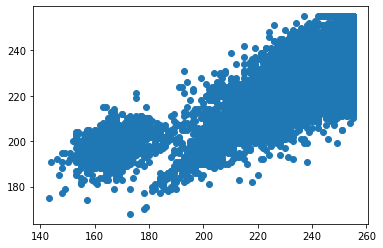

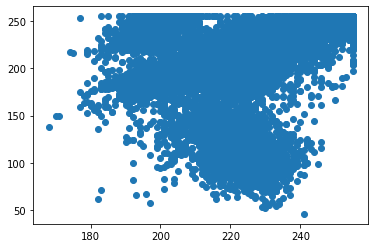

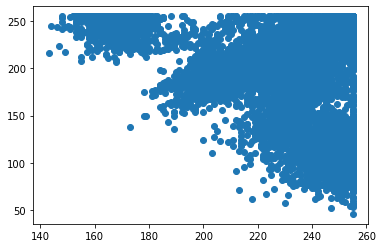

In [10]:
dims = np.shape(img_val)
print(dims)
pixel_matrix_val = np.reshape(img_val, (dims[0] * dims[1], dims[2]))
print(np.shape(pixel_matrix_val))

plt.scatter(pixel_matrix_val[:,0], pixel_matrix_val[:,1])
plt.show()
plt.scatter(pixel_matrix_val[:,1], pixel_matrix_val[:,2])
plt.show()
plt.scatter(pixel_matrix_val[:,0], pixel_matrix_val[:,2])
plt.show()

2D histogram - valid:

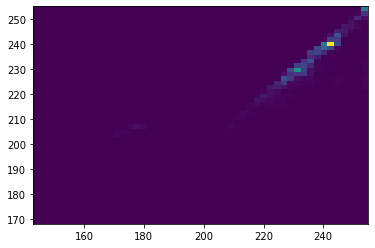

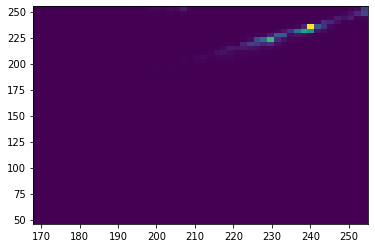

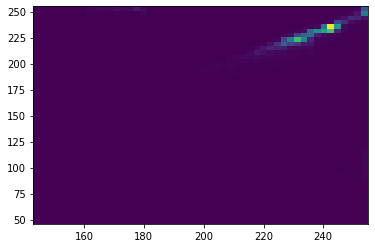

In [11]:
plt.hist2d(pixel_matrix_val[:,0], pixel_matrix_val[:,1], bins=(50,50))
plt.show()
plt.hist2d(pixel_matrix_val[:,1], pixel_matrix_val[:,2], bins=(50,50))
plt.show()
plt.hist2d(pixel_matrix_val[:,0], pixel_matrix_val[:,2], bins=(50,50))
plt.show()

Train-valid razlika na slici u prvom channelu:

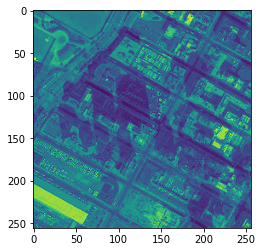

In [12]:
train_arr = np.array(img_train)
val_arr = np.array(img_val)

diff = train_arr[:,:,0] - val_arr[:,:,0]
plt.imshow(diff)

Histogram vrijednosti piksela za train sliku:

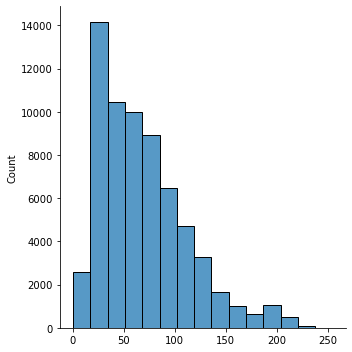

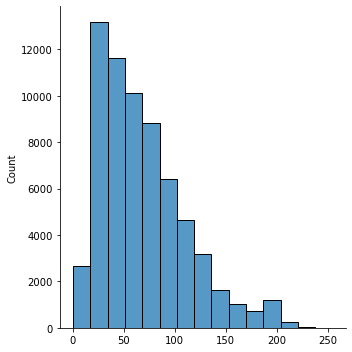

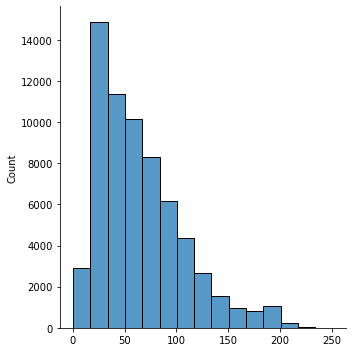

In [13]:
sns.displot(pixel_matrix_train[:,0], bins=15)
sns.displot(pixel_matrix_train[:,1], bins=15)
sns.displot(pixel_matrix_train[:,2], bins=15)

Histogram vrijednosti piksela za test sliku:

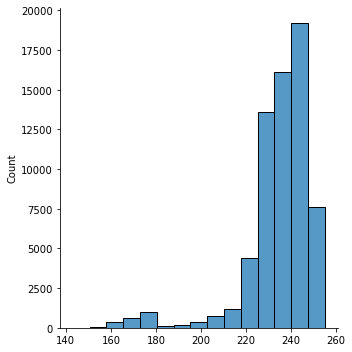

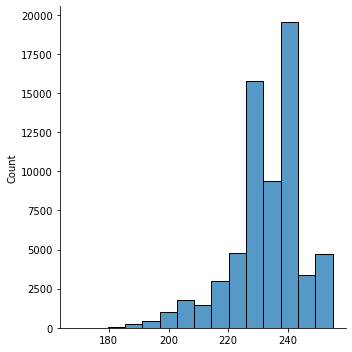

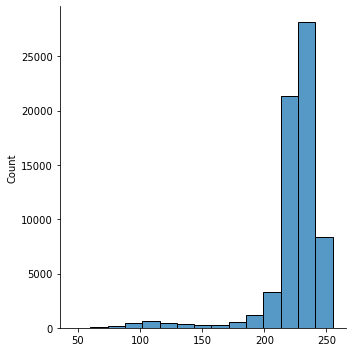

In [14]:
sns.displot(pixel_matrix_val[:,0], bins=15)
sns.displot(pixel_matrix_val[:,1], bins=15)
sns.displot(pixel_matrix_val[:,2], bins=15)